In [235]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# pd.set_option('display.max_rows', None)

In [237]:
app=pd.read_csv('application_data.csv')
prev=pd.read_csv('previous_application.csv')


In [238]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
nrows=app.shape[0]
ncols=app.shape[1]
app.shape

(307511, 122)

In [240]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [241]:
object_columns = app.select_dtypes(include=['object']).columns
print(object_columns)   #these are columns of object/string type 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [242]:
app[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']].head()
#These are the columns of string type, most of them are categorical.

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [243]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [244]:
# Null value analysis

In [245]:
app.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [246]:
(app.isna().sum() / nrows).sort_values(ascending=False).head(70)

COMMONAREA_AVG                 0.698723
COMMONAREA_MODE                0.698723
COMMONAREA_MEDI                0.698723
NONLIVINGAPARTMENTS_MEDI       0.694330
NONLIVINGAPARTMENTS_MODE       0.694330
                                 ...   
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
HOUR_APPR_PROCESS_START        0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
Length: 70, dtype: float64

<Axes: >

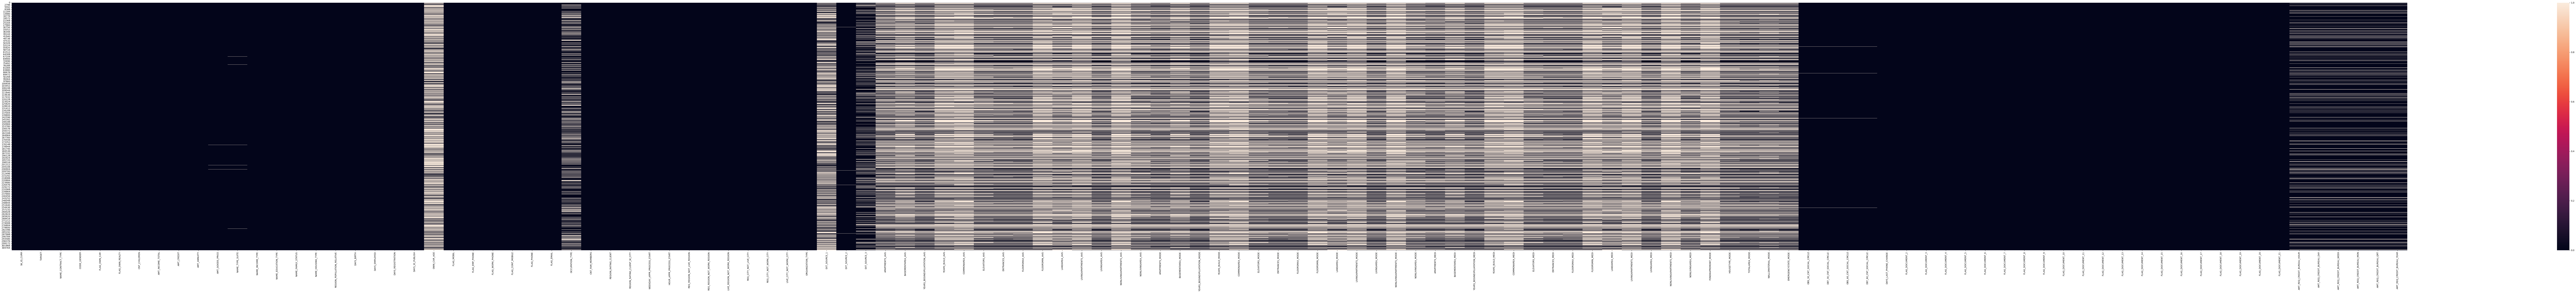

In [247]:
plt.figure(figsize=(240,20))
sns.heatmap(app.isna())   #This heatmap is used to visualize the amount of null values in the entire dataset.

<Axes: xlabel='COMMONAREA_AVG', ylabel='Count'>

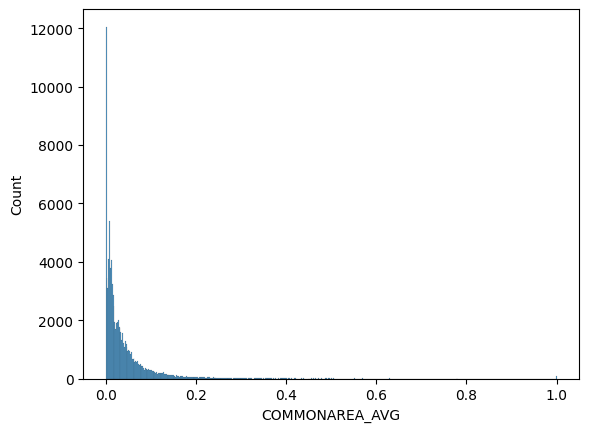

In [137]:
sns.histplot(app['COMMONAREA_AVG'])
# plt.xlim([0,.6])

(0.0, 0.2)

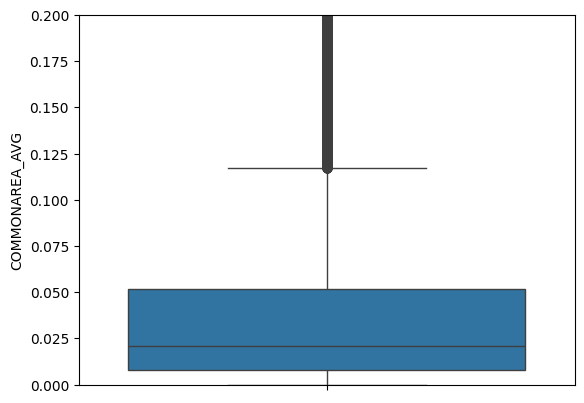

In [138]:
sns.boxplot(app['COMMONAREA_AVG'])
plt.ylim([0,0.2])

In [139]:
np.median(app['COMMONAREA_AVG'].dropna())

np.float64(0.0211)

In [140]:
np.mean(app['COMMONAREA_AVG'].dropna())

np.float64(0.044620715411350736)

In [248]:
prc=app['TARGET'].value_counts().reset_index()
prc['perc']=(prc['count']/app.shape[0])*100
prc
#This shows it is an imbalanced dataset as rows with target=0 are around 91.93% of all the rows in the dataset.

,TARGET,count,perc
0,0,282686,91.927118
1,1,24825,8.072882


<Axes: xlabel='TARGET', ylabel='count'>

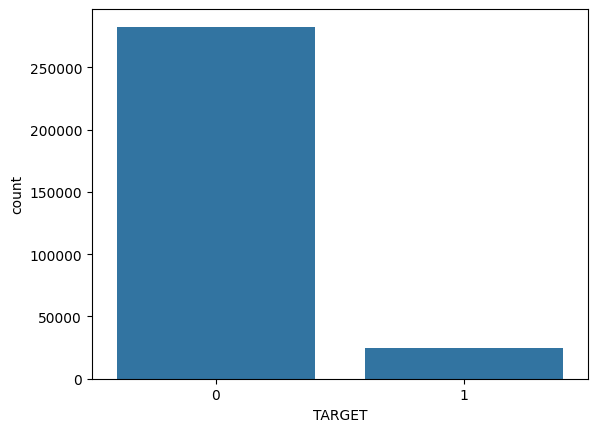

In [142]:
sns.countplot(data=app,x='TARGET')

The above plot shows that the dataset is imbalanced. About 92% of the values of target column are '0' and the rest are '1'.

(0.0, 0.5)

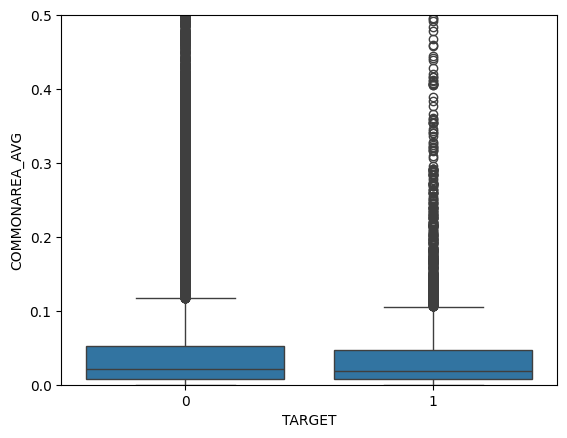

In [143]:
sns.boxplot(data=app,y=app['COMMONAREA_AVG'].dropna(),x='TARGET')
plt.ylim([0,0.5])

The above boxplot shows that for the target variable, the values of 'COMMONAREA_AVG' give the nearly same output(of 0 and 1). So this column will not help a lot in differentiating between a 0 target value and a 1 target value. Hence we drop this column. Same is the case with 'COMMONAREA_MODE' and 'COMMONAREA_MEDI' column

(0.0, 0.5)

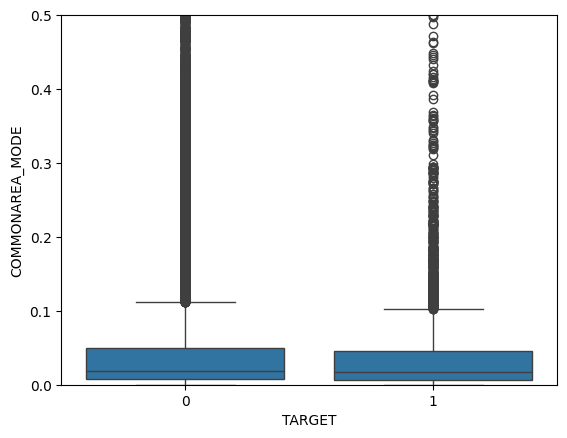

In [144]:
sns.boxplot(data=app,y=app['COMMONAREA_MODE'].dropna(),x='TARGET')
plt.ylim([0,0.5])

(0.0, 0.5)

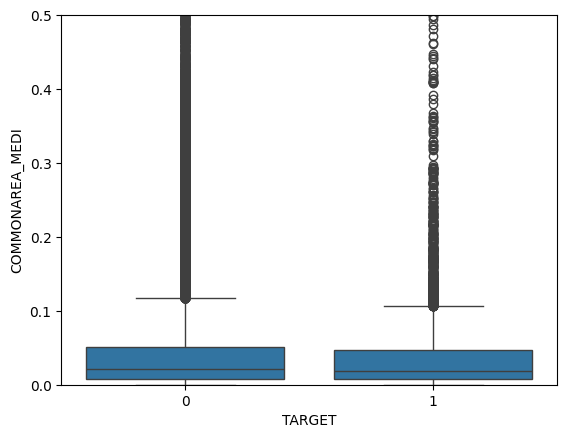

In [145]:
sns.boxplot(data=app,y=app['COMMONAREA_MEDI'].dropna(),x='TARGET')
plt.ylim([0,0.5])

(0.0, 0.01)

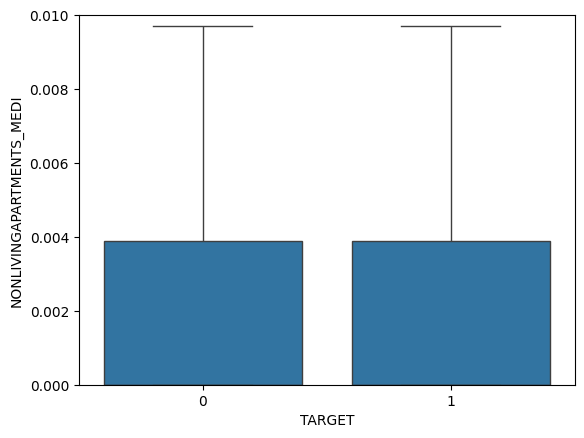

In [146]:
sns.boxplot(data=app,y=app['NONLIVINGAPARTMENTS_MEDI'].dropna(),x='TARGET')
plt.ylim([0,0.01])

The above boxplots show that these features do not have a huge impact on the 'TARGET' column.

<Axes: xlabel='FONDKAPREMONT_MODE', ylabel='count'>

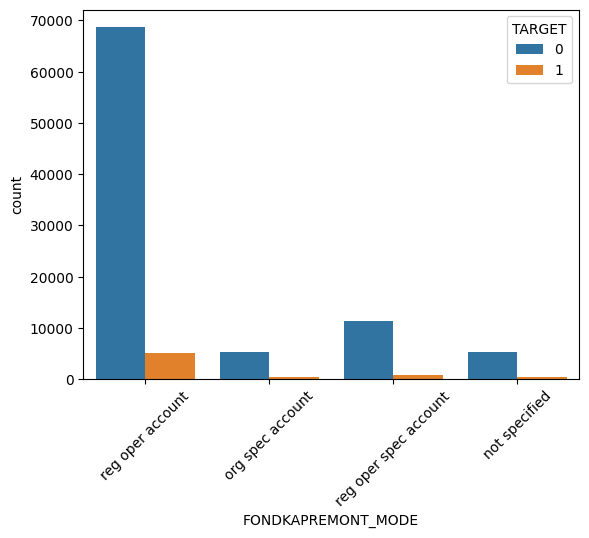

In [153]:
plt.xticks(rotation=45)
sns.countplot(data=app,x='FONDKAPREMONT_MODE',hue='TARGET')

In [25]:
app['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [26]:
app['FONDKAPREMONT_MODE'].dropna().head()

0     reg oper account
1     reg oper account
12    reg oper account
13    reg oper account
14    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object

(0.0, 0.3)

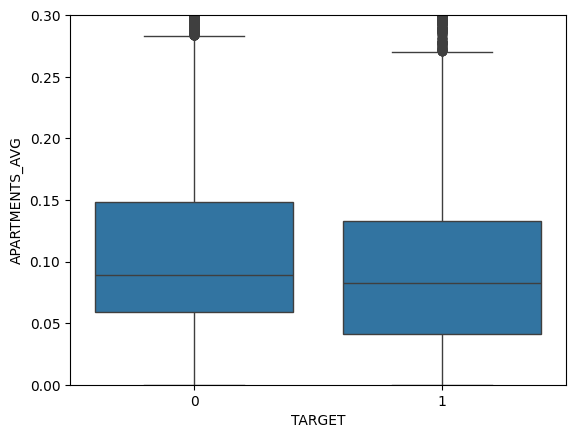

In [28]:
sns.boxplot(data=app,y=app['APARTMENTS_AVG'].dropna(),x='TARGET')
plt.ylim([0,.3])

(0.0, 23.0)

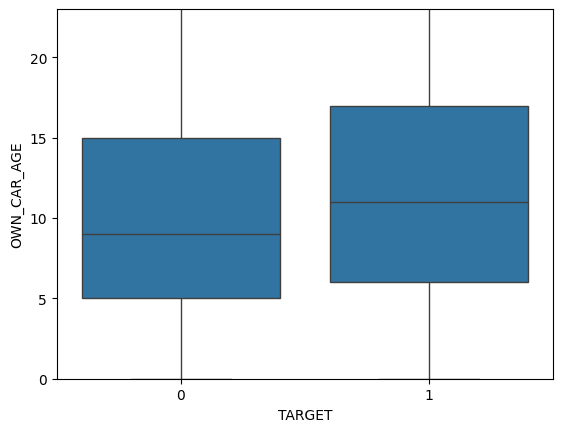

In [29]:
sns.boxplot(data=app,y=app['OWN_CAR_AGE'].dropna(),x='TARGET')
plt.ylim([0,23])

(0.0, 0.3)

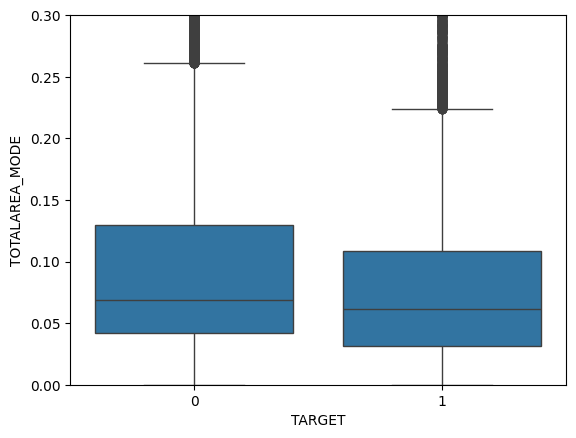

In [30]:
sns.boxplot(data=app,y=app['TOTALAREA_MODE'].dropna(),x='TARGET')
plt.ylim([0,0.3])
# plt.xlim([0,.2])


The above boxplots show that for the continuous variables in the app dataset most of the values which talk about mean,median, mode statistics 
eventually lead to very similiar target values of 0 and 1 so dropping these values will not hugely affect our target values.

In [31]:
obj_cols_app=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
#These are categorical columns

In [32]:
null_df=(app.drop(obj_cols_app,axis=1).isna().sum() / nrows).sort_values(ascending=False).reset_index()
object_columns = app.select_dtypes(include=['object']).columns
# null_df[null_df['index'] not in object_columns]
# null_df[null_df['index'] not in obj_cols_app]
null_df

,index,0
0,COMMONAREA_AVG,0.698723
1,COMMONAREA_MODE,0.698723
2,COMMONAREA_MEDI,0.698723
3,NONLIVINGAPARTMENTS_MODE,0.694330
4,NONLIVINGAPARTMENTS_AVG,0.694330
...,...,...
101,FLAG_DOCUMENT_16,0.000000
102,FLAG_DOCUMENT_15,0.000000
103,FLAG_DOCUMENT_14,0.000000
104,FLAG_DOCUMENT_20,0.000000


In [33]:
null_df_drop=null_df[null_df[0]>.47]
null_df_drop

,index,0
0,COMMONAREA_AVG,0.698723
1,COMMONAREA_MODE,0.698723
2,COMMONAREA_MEDI,0.698723
3,NONLIVINGAPARTMENTS_MODE,0.694330
4,NONLIVINGAPARTMENTS_AVG,0.694330
5,NONLIVINGAPARTMENTS_MEDI,0.694330
6,LIVINGAPARTMENTS_AVG,0.683550
7,LIVINGAPARTMENTS_MODE,0.683550
8,LIVINGAPARTMENTS_MEDI,0.683550
9,FLOORSMIN_AVG,0.678486


In [34]:
lst=list(null_df_drop['index'])
lst

['COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'TOTALAREA_MODE']

In [35]:
app=app.drop(lst,axis=1)
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
app.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

<Axes: xlabel='TARGET', ylabel='AMT_REQ_CREDIT_BUREAU_MON'>

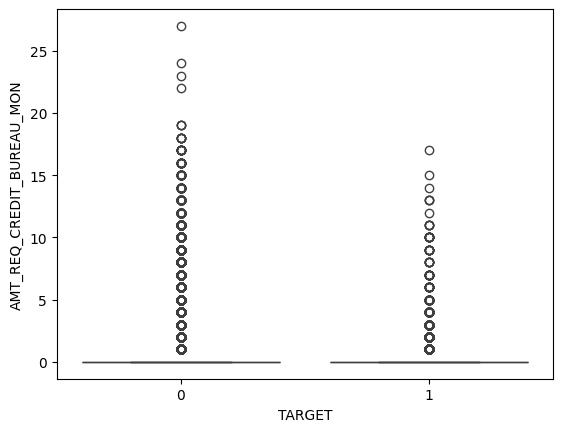

In [164]:
sns.boxplot(data=app,y=app['AMT_REQ_CREDIT_BUREAU_MON'].dropna(),x='TARGET')
# plt.ylim([0,1])

In [38]:
np.mean(app['AMT_REQ_CREDIT_BUREAU_MON'].dropna()) #FINDS mean of the column

np.float64(0.26739526000781977)

(0.0, 5.0)

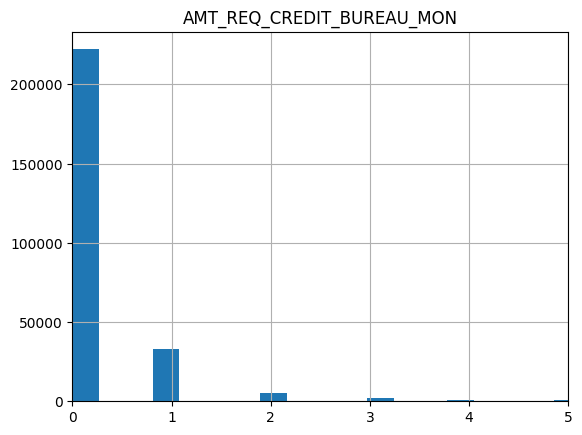

In [165]:
app.hist('AMT_REQ_CREDIT_BUREAU_MON',bins=100) #most of the values are in the 0 and 1 category
plt.xlim([0,5])

In [40]:
df0=app[app['TARGET']==0]
df1=app[app['TARGET']==1]


(0.0, 50000.0)

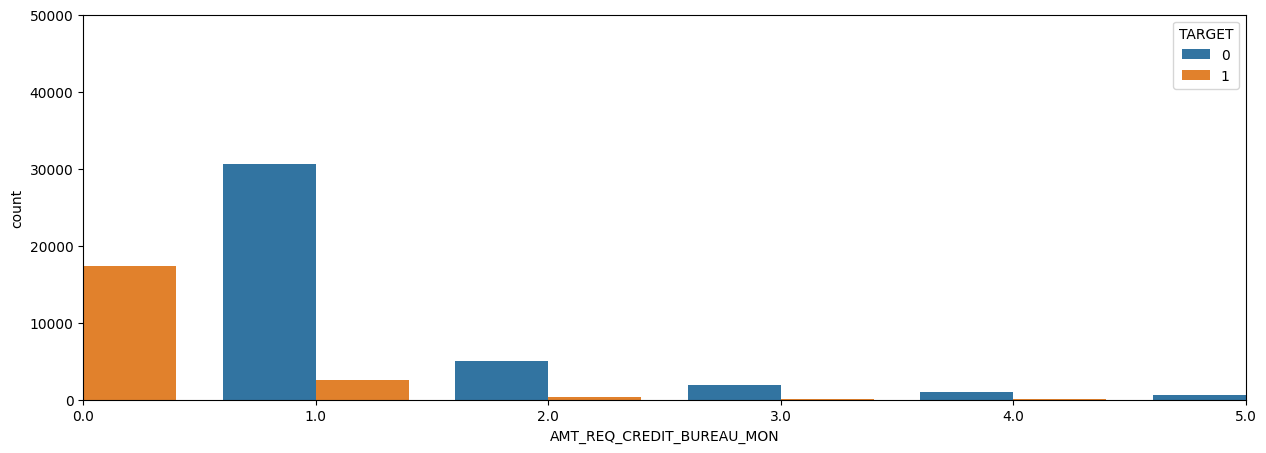

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(data=app,x='AMT_REQ_CREDIT_BUREAU_MON',hue='TARGET')
plt.xlim([0,5])
plt.ylim([0,50000])


In [44]:
x=app.drop(obj_cols_app,axis=1)
# plt.figure(figsize=(50,50))
x

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
(app.isna().sum() / nrows).sort_values(ascending=False).head(80)

FONDKAPREMONT_MODE     0.683862
WALLSMATERIAL_MODE     0.508408
HOUSETYPE_MODE         0.501761
EMERGENCYSTATE_MODE    0.473983
OCCUPATION_TYPE        0.313455
                         ...   
FLAG_DOCUMENT_16       0.000000
FLAG_DOCUMENT_15       0.000000
FLAG_DOCUMENT_14       0.000000
FLAG_DOCUMENT_20       0.000000
FLAG_DOCUMENT_21       0.000000
Length: 77, dtype: float64

In [47]:
app.isna().sum().sort_values(ascending=False).head(25)

FONDKAPREMONT_MODE            210295
WALLSMATERIAL_MODE            156341
HOUSETYPE_MODE                154297
EMERGENCYSTATE_MODE           145755
OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
TARGET                             0
SK_ID_CURR                         0
AMT_CREDIT                         0
dtype: int64

In [166]:
#Percentage of null values in the dataset - app
# COMMONAREA_AVG                  0.698723
# COMMONAREA_MODE                 0.698723
# COMMONAREA_MEDI                 0.698723
# NONLIVINGAPARTMENTS_MEDI        0.694330
# NONLIVINGAPARTMENTS_MODE        0.694330
# NONLIVINGAPARTMENTS_AVG         0.694330
# FONDKAPREMONT_MODE              0.683862
# LIVINGAPARTMENTS_AVG            0.683550
# LIVINGAPARTMENTS_MEDI           0.683550
# LIVINGAPARTMENTS_MODE           0.683550
# FLOORSMIN_MODE                  0.678486
# FLOORSMIN_AVG                   0.678486
# FLOORSMIN_MEDI                  0.678486
# YEARS_BUILD_AVG                 0.664978
# YEARS_BUILD_MODE                0.664978
# YEARS_BUILD_MEDI                0.664978
# OWN_CAR_AGE                     0.659908
# LANDAREA_MEDI                   0.593767
# LANDAREA_AVG                    0.593767
# LANDAREA_MODE                   0.593767
# BASEMENTAREA_MODE               0.585160
# BASEMENTAREA_MEDI               0.585160
# BASEMENTAREA_AVG                0.585160
# EXT_SOURCE_1                    0.563811
# NONLIVINGAREA_MODE              0.551792
# NONLIVINGAREA_AVG               0.551792
# NONLIVINGAREA_MEDI              0.551792
# ELEVATORS_AVG                   0.532960
# ELEVATORS_MEDI                  0.532960
# ELEVATORS_MODE                  0.532960
# WALLSMATERIAL_MODE              0.508408
# APARTMENTS_AVG                  0.507497
# APARTMENTS_MEDI                 0.507497
# APARTMENTS_MODE                 0.507497
# ENTRANCES_MODE                  0.503488
# ENTRANCES_MEDI                  0.503488
# ENTRANCES_AVG                   0.503488
# LIVINGAREA_AVG                  0.501933
# LIVINGAREA_MEDI                 0.501933
# LIVINGAREA_MODE                 0.501933
# HOUSETYPE_MODE                  0.501761
# FLOORSMAX_MODE                  0.497608
# FLOORSMAX_AVG                   0.497608
# FLOORSMAX_MEDI                  0.497608
# YEARS_BEGINEXPLUATATION_MODE    0.487810
# YEARS_BEGINEXPLUATATION_MEDI    0.487810
# YEARS_BEGINEXPLUATATION_AVG     0.487810
# TOTALAREA_MODE                  0.482685
# EMERGENCYSTATE_MODE             0.473983
# OCCUPATION_TYPE COMMONAREA_AVG                  0.698723
# COMMONAREA_MODE                 0.698723
# COMMONAREA_MEDI                 0.698723
# NONLIVINGAPARTMENTS_MEDI        0.694330
# NONLIVINGAPARTMENTS_MODE        0.694330
# NONLIVINGAPARTMENTS_AVG         0.694330
# FONDKAPREMONT_MODE              0.683862
# LIVINGAPARTMENTS_AVG            0.683550
# LIVINGAPARTMENTS_MEDI           0.683550
# LIVINGAPARTMENTS_MODE           0.683550
# FLOORSMIN_MODE                  0.678486
# FLOORSMIN_AVG                   0.678486
# FLOORSMIN_MEDI                  0.678486
# YEARS_BUILD_AVG                 0.664978
# YEARS_BUILD_MODE                0.664978
# YEARS_BUILD_MEDI                0.664978
# OWN_CAR_AGE                     0.659908
# LANDAREA_MEDI                   0.593767
# LANDAREA_AVG                    0.593767
# LANDAREA_MODE                   0.593767
# BASEMENTAREA_MODE               0.585160
# BASEMENTAREA_MEDI               0.585160
# BASEMENTAREA_AVG                0.585160
# EXT_SOURCE_1                    0.563811
# NONLIVINGAREA_MODE              0.551792
# NONLIVINGAREA_AVG               0.551792
# NONLIVINGAREA_MEDI              0.551792
# ELEVATORS_AVG                   0.532960
# ELEVATORS_MEDI                  0.532960
# ELEVATORS_MODE                  0.532960
# WALLSMATERIAL_MODE              0.508408
# APARTMENTS_AVG                  0.507497
# APARTMENTS_MEDI                 0.507497
# APARTMENTS_MODE                 0.507497
# ENTRANCES_MODE                  0.503488
# ENTRANCES_MEDI                  0.503488
# ENTRANCES_AVG                   0.503488
# LIVINGAREA_AVG                  0.501933
# LIVINGAREA_MEDI                 0.501933
# LIVINGAREA_MODE                 0.501933
# HOUSETYPE_MODE                  0.501761
# FLOORSMAX_MODE                  0.497608
# FLOORSMAX_AVG                   0.497608
# FLOORSMAX_MEDI                  0.497608
# YEARS_BEGINEXPLUATATION_MODE    0.487810
# YEARS_BEGINEXPLUATATION_MEDI    0.487810
# YEARS_BEGINEXPLUATATION_AVG     0.487810
# TOTALAREA_MODE                  0.482685
# EMERGENCYSTATE_MODE             0.473983
# OCCUPATION_TYPE 

In [167]:
app['FLAG_DOCUMENT_10'].value_counts()

FLAG_DOCUMENT_10
0    307504
1         7
Name: count, dtype: int64

In [168]:
app['FLAG_DOCUMENT_2'].value_counts()


FLAG_DOCUMENT_2
0    307498
1        13
Name: count, dtype: int64

The above figures show that a huge number of people have not submitted these documents. Hence we drop these flag document columns

In [169]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [170]:
pd.crosstab(app.FLAG_DOCUMENT_10,app.TARGET)

TARGET,0,1
FLAG_DOCUMENT_10,,
0,282679,24825
1,7,0


In [171]:
pd.crosstab(app.FLAG_DOCUMENT_5,app.TARGET)

TARGET,0,1
FLAG_DOCUMENT_5,,
0,278410,24453
1,4276,372


In [172]:
app=app.drop(['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],axis=1)

In [173]:
app['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

In [174]:
pd.crosstab(app.DEF_30_CNT_SOCIAL_CIRCLE,app.TARGET)

TARGET,0,1
DEF_30_CNT_SOCIAL_CIRCLE,,
0.0,250226,21098
1.0,25454,2874
2.0,4703,620
3.0,1039,153
4.0,218,35
5.0,48,8
6.0,10,1
7.0,1,0
8.0,1,0


In [175]:
app['FLAG_MOBIL'].value_counts()


FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

In [176]:
# FLAG_EMP_PHONE
# FLAG_WORK_PHONE
# FLAG_CONT_MOBILE
# FLAG_PHONE
# FLAG_EMAIL


In [177]:
app['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
0    290069
1     17442
Name: count, dtype: int64

In [178]:
pd.crosstab(app.FLAG_EMAIL,app.TARGET)


TARGET,0,1
FLAG_EMAIL,,
0,266618,23451
1,16068,1374


<Axes: xlabel='FLAG_EMAIL', ylabel='count'>

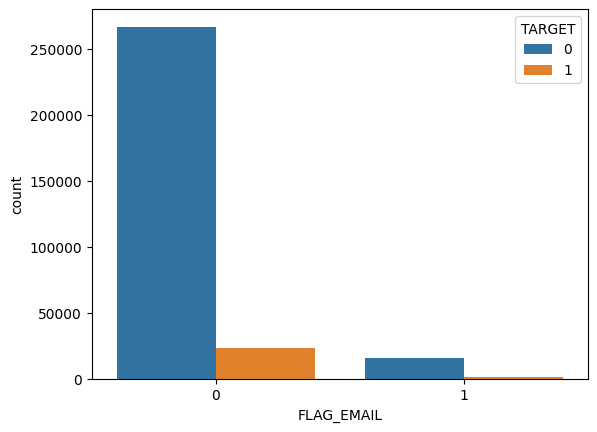

In [179]:
sns.countplot(data=app,x='FLAG_EMAIL',hue='TARGET')

The countplot for flag_email shows that in very less cases emails are submitted, thus we can drop this column

In [181]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=102)

In [182]:
flag_vars=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
flag_vars

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

<Axes: xlabel='FLAG_MOBIL', ylabel='count'>

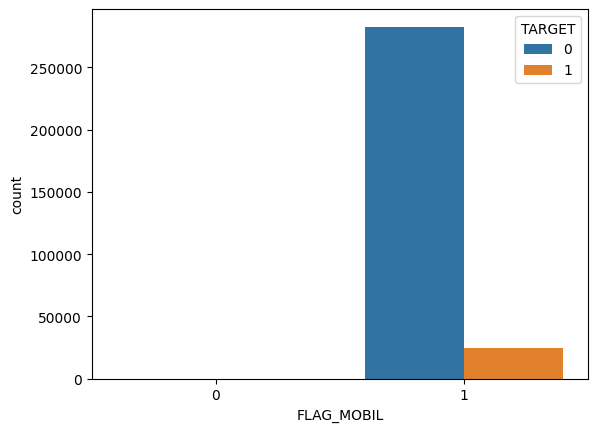

In [184]:
sns.countplot(data=app,x='FLAG_MOBIL',hue='TARGET') #here nearly in all of the cases mobile phone is submitted.

In [185]:
# sns.countplot(data=app,x='FLAG_EMP_PHONE',hue='TARGET')
pd.crosstab(app.FLAG_EMP_PHONE,app.TARGET)


TARGET,0,1
FLAG_EMP_PHONE,,
0,52395,2991
1,230291,21834


<Axes: xlabel='FLAG_WORK_PHONE', ylabel='count'>

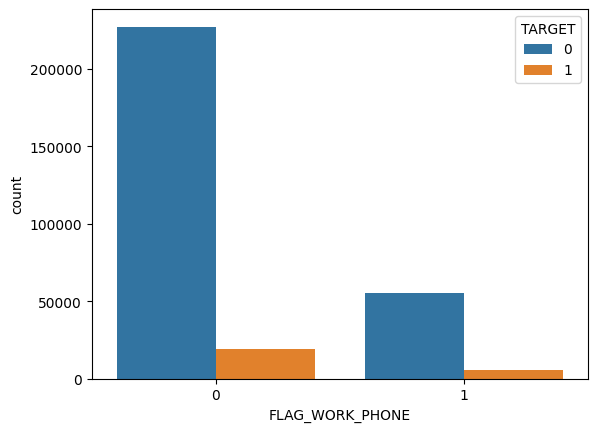

In [186]:
sns.countplot(data=app,x='FLAG_WORK_PHONE',hue='TARGET')

<Axes: xlabel='FLAG_EMAIL', ylabel='count'>

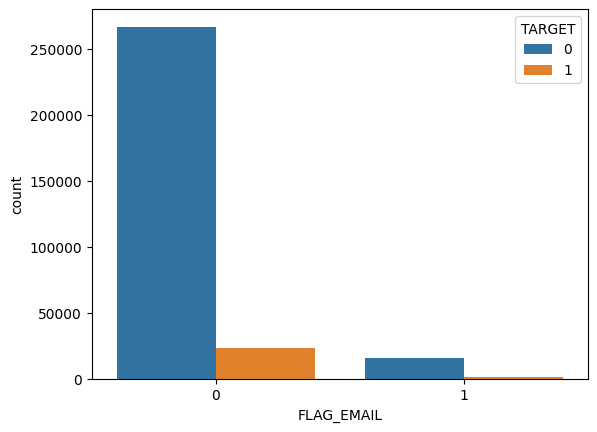

In [187]:
sns.countplot(data=app,x='FLAG_EMAIL',hue='TARGET')

The above graphs show that almost in all of the cases either flag variables are provided or not provided at all and do not differ in cases of 0 or 1 for the target variable, hence we can drop these columns.

In [188]:
app=app.drop(['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL'],axis=1)

In [189]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
app.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 96, dtype: int64

In [191]:
import warnings 
warnings.filterwarnings('ignore')
from pandas.api.types import is_numeric_dtype
for i in app.columns: 
    if is_numeric_dtype(app[i]):
        app[i].fillna(app[i].median(), inplace=True)

In [192]:
app.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 96, dtype: int64

In [193]:
app.shape

(307511, 96)

In [194]:
(96391/307511)*100

31.345545362604916

In [195]:
app=app.drop(['HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE'],axis=1)  #contains around 50% null values hence dropped

In [196]:
(app.isna().sum()/307511)*100  

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 92, dtype: float64

In [197]:
app['OCCUPATION_TYPE']=app['OCCUPATION_TYPE'].fillna('Not Specified') #filling the occupation type with 'Not Specified' wherever null values are present.

In [198]:
(app.isna().sum()/307511)*100  

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 92, dtype: float64

In [199]:
app=app.dropna()  #hence we get the cleaned data here by removing unwanted columns and removing as less number of rows as possible
app.shape

(306219, 92)

In [200]:
app.isna().sum()  

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 92, dtype: int64

# Analysis

<Axes: xlabel='CODE_GENDER', ylabel='count'>

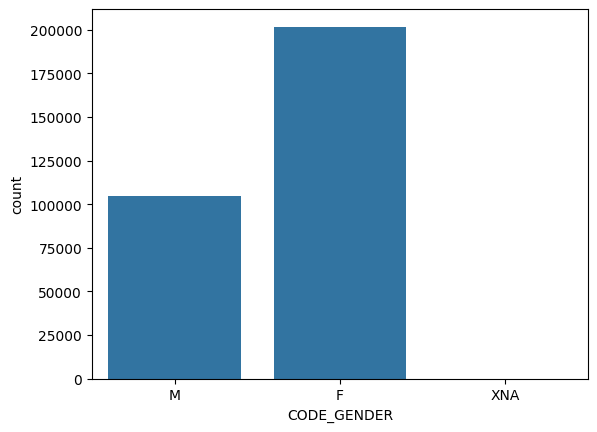

In [201]:
sns.countplot(data=app,x='CODE_GENDER') #Shows that there are more number of females than males and XNA in the dataset.

CODE_GENDER                F        M  XNA
NAME_CONTRACT_TYPE                        
Cash loans          182190.0  95035.0  NaN
Revolving loans      19453.0   9537.0  4.0


<Axes: xlabel='NAME_CONTRACT_TYPE'>

<Figure size 2500x500 with 0 Axes>

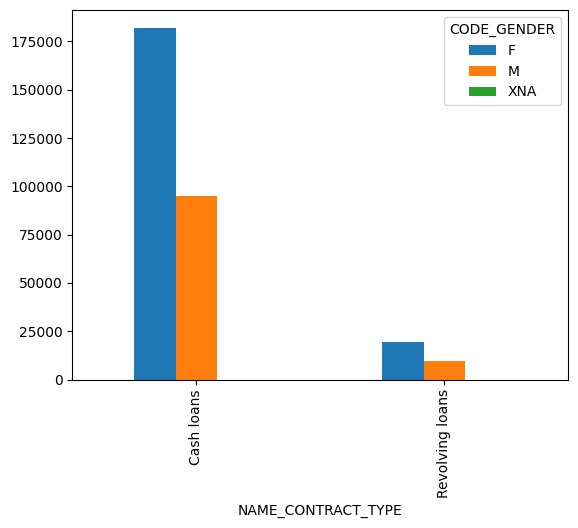

In [202]:
df_new2=app.pivot_table('TARGET','NAME_CONTRACT_TYPE','CODE_GENDER',aggfunc='size')  # or np.size
print(df_new2)
plt.figure(figsize=(25,5))
df_new2.plot(kind='bar')

The above barplot shows that Cash Loans are more in number than revolving loans. It also gives an idea about the proportion of females and males opting for cash loans and revolving loans.

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

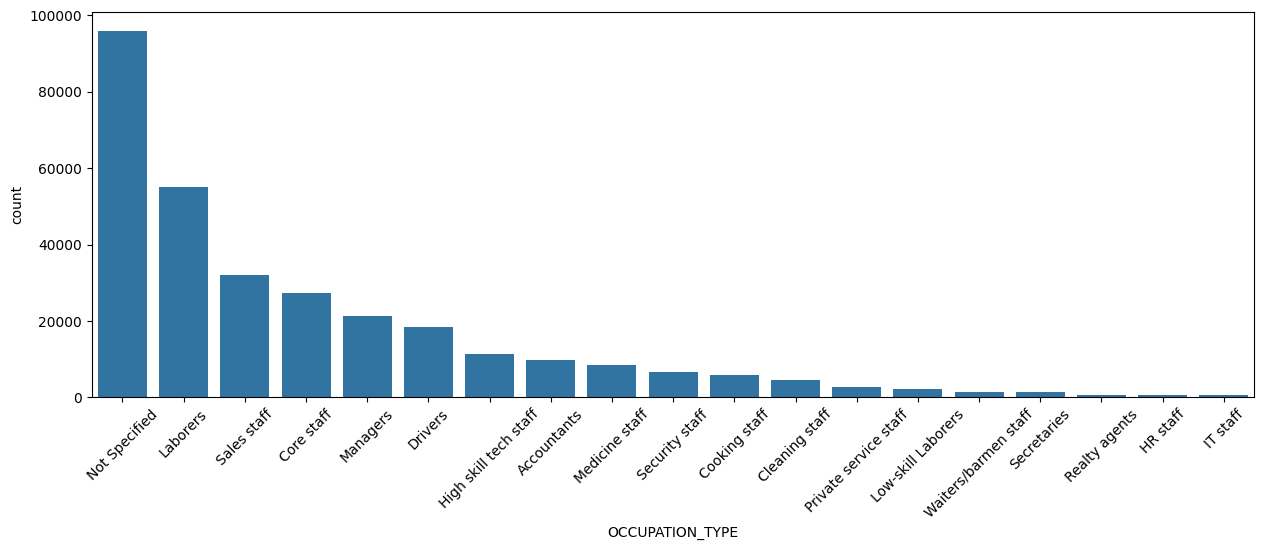

In [203]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(app['OCCUPATION_TYPE'].value_counts())

The above barplot shows that most of the people have not specified their occupation type but apart from that the 'labourer' group is the one that is most involved in the dataset.

In [204]:
#Continuous -

In [205]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.0, 3000000.0)

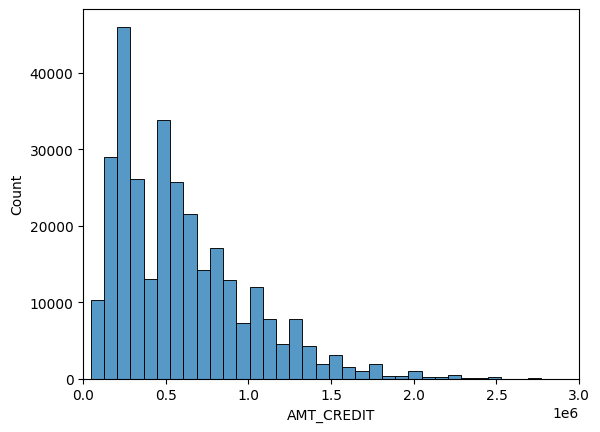

In [206]:
sns.histplot(data=app,x='AMT_CREDIT',bins=50)
plt.xlim([0,3000000])

The above histogram shows that the 'amt_credit' feature is a right skewed graph. i.e most of the values lie in the left portion of the graph and that most of the people in the study have a lower credit amount of the loan.

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

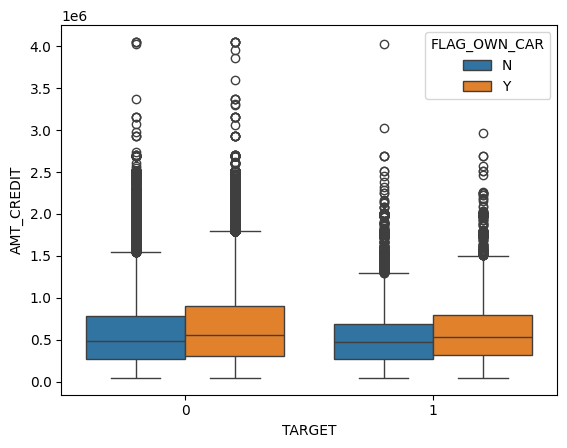

In [207]:
sns.boxplot(data=app,x='TARGET',y='AMT_CREDIT',hue='FLAG_OWN_CAR')

The above boxplot shows that those who own a car generally have a higher credit amount of loan

(0.0, 500000.0)

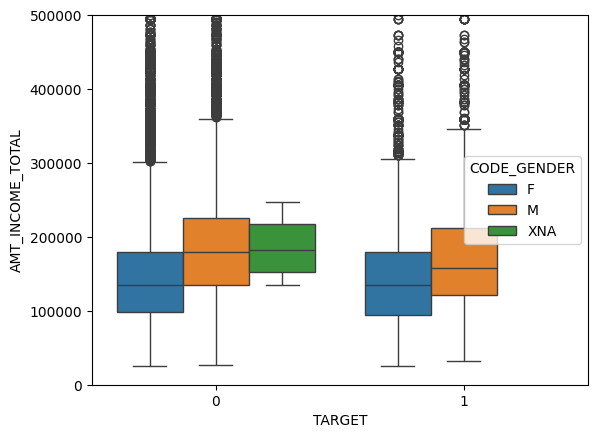

In [208]:
sns.boxplot(data=app,x='TARGET',y='AMT_INCOME_TOTAL',hue='CODE_GENDER')
plt.ylim([0,500000])

The above boxplot shows that males tend to generally have slightly higher income.

(0.0, 1500000.0)

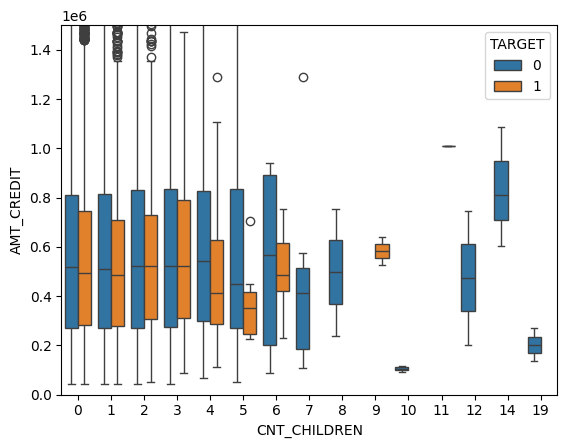

In [209]:
sns.boxplot(data=app,x='CNT_CHILDREN',y='AMT_CREDIT',hue='TARGET')
plt.ylim([0,1500000])

(0.0, 400000.0)

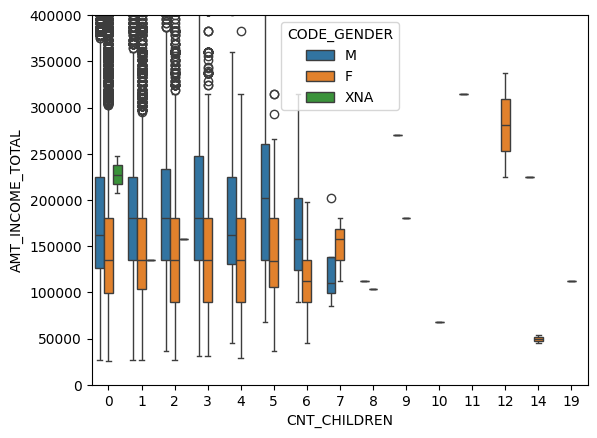

In [210]:
sns.boxplot(data=app,x='CNT_CHILDREN',y='AMT_INCOME_TOTAL',hue='CODE_GENDER')
plt.ylim([0,400000])


The above plots show that number of children does not have a great effect on the target variable.

# Prev Data-

In [212]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [214]:
prev.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [215]:
prev.shape[0]

1670214

<Axes: >

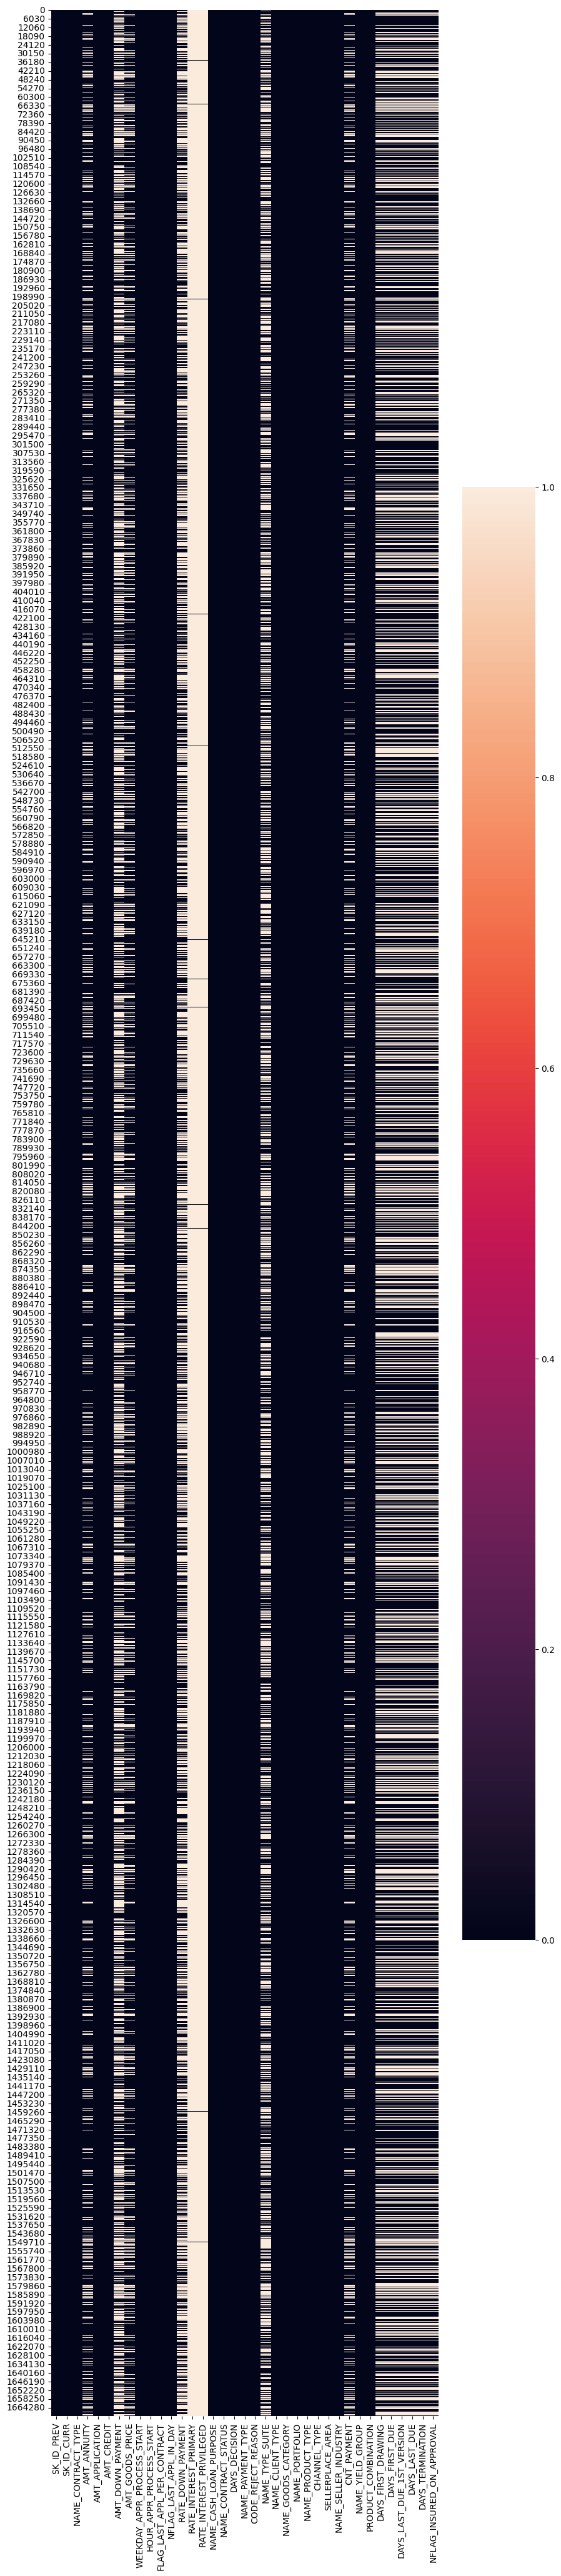

In [216]:
plt.figure(figsize=(10,50))
sns.heatmap(prev.isna())

In [217]:
((prev.isna().sum() / prev.shape[0])*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_PREV                      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_ST

In [218]:
df_nulls=((prev.isna().sum() / prev.shape[0])*100).reset_index()
drop_cols=list(df_nulls[df_nulls[0]>40]['index'])  #dropping all columns where we have more than 40% null values.
drop_cols

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [219]:
prev=prev.drop(drop_cols,axis=1)
prev

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [220]:
((prev.isna().sum() / prev.shape[0])*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_PREV                      0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_SELLER_INDU

In [221]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [222]:
np.mean(prev['AMT_ANNUITY'])

np.float64(15955.120659452119)

In [223]:
np.median(prev['AMT_ANNUITY'].dropna())


np.float64(11250.0)

In [224]:
np.mean(prev['AMT_GOODS_PRICE'].dropna())

np.float64(227847.2792833456)

In [225]:
np.median(prev['AMT_GOODS_PRICE'].dropna())


np.float64(112320.0)

In [107]:
np.mean(prev['CNT_PAYMENT'].dropna())

np.float64(16.0540815603274)

In [108]:
np.median(prev['CNT_PAYMENT'].dropna())


np.float64(12.0)

In [109]:
#Filling up these continuous data columns with their medians-

prev['AMT_ANNUITY']=prev['AMT_ANNUITY'].fillna(np.median(prev['AMT_ANNUITY'].dropna()))
prev['AMT_GOODS_PRICE']=prev['AMT_GOODS_PRICE'].fillna(np.median(prev['AMT_GOODS_PRICE'].dropna()))
prev['CNT_PAYMENT']=prev['CNT_PAYMENT'].fillna(np.median(prev['CNT_PAYMENT'].dropna()))

In [110]:
((prev.isna().sum() / prev.shape[0])*100).sort_values(ascending=False)

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
SK_ID_PREV                     0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
DAYS_DECISION                  0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000


In [111]:
#hence all the null values are either filled or dropped and the data is cleaned. 
prev=prev.dropna()
prev.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [112]:
prev.shape

(1669867, 26)

# Joining the two datasets

In [113]:
df=pd.merge(app,prev,how='inner',on='SK_ID_CURR')

In [114]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409859,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle
1409860,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street
1409861,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low
1409862,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409864 entries, 0 to 1409863
Data columns (total 72 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1409864 non-null  int64  
 1   TARGET                        1409864 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1409864 non-null  object 
 3   CODE_GENDER                   1409864 non-null  object 
 4   FLAG_OWN_CAR                  1409864 non-null  object 
 5   FLAG_OWN_REALTY               1409864 non-null  object 
 6   CNT_CHILDREN                  1409864 non-null  int64  
 7   AMT_INCOME_TOTAL              1409864 non-null  float64
 8   AMT_CREDIT_x                  1409864 non-null  float64
 9   AMT_ANNUITY_x                 1409864 non-null  float64
 10  AMT_GOODS_PRICE_x             1409864 non-null  float64
 11  NAME_TYPE_SUITE               1409864 non-null  object 
 12  NAME_INCOME_TYPE            

In [116]:
df_objs= df.select_dtypes(include=['object']).columns
print(df_objs)  

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [117]:
plt.figure(figsize=(50,50))
df.drop(df_objs,axis=1).corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_CURR,1.000000,-0.001328,-0.003309,0.000028,-0.001042,-0.001552,-0.000597,0.000287,-0.002365,0.000951,...,0.000190,0.000097,0.000014,-0.000021,0.000099,0.001953,-0.000687,-0.000424,0.001355,-0.000280
TARGET,-0.001328,1.000000,0.020371,-0.002126,-0.023663,-0.007416,-0.032539,-0.034991,0.075226,-0.047889,...,0.002026,-0.015866,-0.005578,-0.002419,-0.002826,-0.027809,-0.002650,0.039893,-0.002522,0.023701
CNT_CHILDREN,-0.003309,0.020371,1.000000,0.011703,0.002888,0.029620,-0.001078,-0.022064,0.363109,-0.247968,...,-0.002730,-0.032558,-0.034199,-0.034878,-0.040212,0.017132,0.000797,-0.012770,0.000790,-0.046581
AMT_INCOME_TOTAL,0.000028,-0.002126,0.011703,1.000000,0.165936,0.206018,0.167475,0.076701,0.025749,-0.067490,...,0.000355,0.098997,0.071444,0.070610,0.076356,0.043278,-0.000130,0.004002,0.001645,0.016137
AMT_CREDIT_x,-0.001042,-0.023663,0.002888,0.165936,1.000000,0.758361,0.986341,0.085458,-0.047733,-0.061004,...,-0.000429,0.137997,0.118792,0.116728,0.122072,0.046517,0.001164,-0.060057,0.003470,0.035998
AMT_ANNUITY_x,-0.001552,-0.007416,0.029620,0.206018,0.758361,1.000000,0.762356,0.102879,0.029420,-0.109538,...,0.000855,0.178177,0.112075,0.107640,0.116692,0.059995,0.001199,-0.034602,0.004501,-0.004436
AMT_GOODS_PRICE_x,-0.000597,-0.032539,-0.001078,0.167475,0.986341,0.762356,1.000000,0.088159,-0.046222,-0.058405,...,-0.000235,0.140005,0.120689,0.117175,0.123579,0.053241,0.001599,-0.061413,0.004425,0.034633
REGION_POPULATION_RELATIVE,0.000287,-0.034991,-0.022064,0.076701,0.085458,0.102879,0.088159,1.000000,-0.039929,0.000567,...,0.000909,0.070369,0.044655,0.045057,0.046936,0.154815,-0.000321,-0.025726,0.001118,-0.000156
DAYS_BIRTH,-0.002365,0.075226,0.363109,0.025749,-0.047733,0.029420,-0.046222,-0.039929,1.000000,-0.625176,...,-0.001533,-0.071904,-0.079722,-0.078006,-0.090018,0.123781,0.000370,0.025396,0.005075,-0.106575
DAYS_EMPLOYED,0.000951,-0.047889,-0.247968,-0.067490,-0.061004,-0.109538,-0.058405,0.000567,-0.625176,1.000000,...,0.000983,-0.007362,0.009510,0.003803,0.013619,-0.107822,0.002963,0.015315,-0.002338,0.061371


<Figure size 5000x5000 with 0 Axes>

In [118]:
df_new=df.drop(df_objs,axis=1).corr()

In [119]:
(df_new>0.8).sum() #columns which have correlation with another column greater than 0.8 

SK_ID_CURR                     1
TARGET                         1
CNT_CHILDREN                   2
AMT_INCOME_TOTAL               1
AMT_CREDIT_x                   2
AMT_ANNUITY_x                  1
AMT_GOODS_PRICE_x              2
REGION_POPULATION_RELATIVE     1
DAYS_BIRTH                     1
DAYS_EMPLOYED                  1
DAYS_REGISTRATION              1
DAYS_ID_PUBLISH                1
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           2
REGION_RATING_CLIENT_W_CITY    2
HOUR_APPR_PROCESS_START_x      1
REG_REGION_NOT_LIVE_REGION     1
REG_REGION_NOT_WORK_REGION     2
LIVE_REGION_NOT_WORK_REGION    2
REG_CITY_NOT_LIVE_CITY         1
REG_CITY_NOT_WORK_CITY         2
LIVE_CITY_NOT_WORK_CITY        2
EXT_SOURCE_2                   1
EXT_SOURCE_3                   1
OBS_30_CNT_SOCIAL_CIRCLE       2
DEF_30_CNT_SOCIAL_CIRCLE       2
OBS_60_CNT_SOCIAL_CIRCLE       2
DEF_60_CNT_SOCIAL_CIRCLE       2
DAYS_LAST_PHONE_CHANGE         1
AMT_REQ_CREDIT_BUREAU_HOUR     1
AMT_REQ_CR

<Axes: >

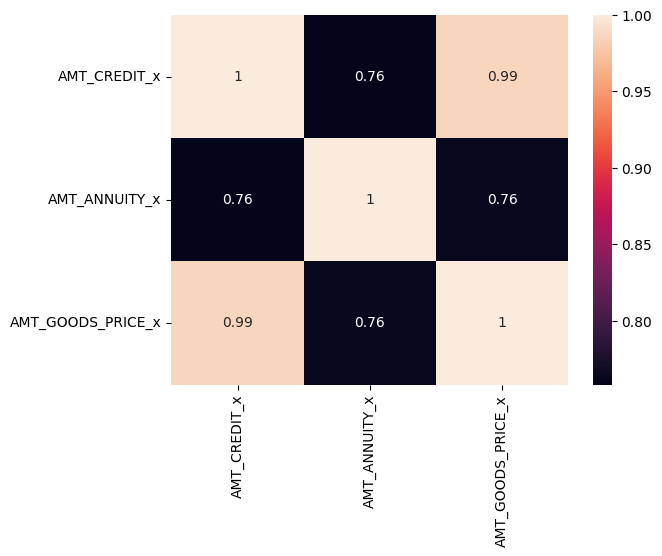

In [120]:
sns.heatmap(df[['AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x']].corr(),annot=True)

The above heatmap shows that there is a high positive correlation between the credit amount of the loan and the price of goods for which the loan is given.<br> 
Also there is a high correlation between the credit amount of the loan and the loan annuity.

<Axes: >

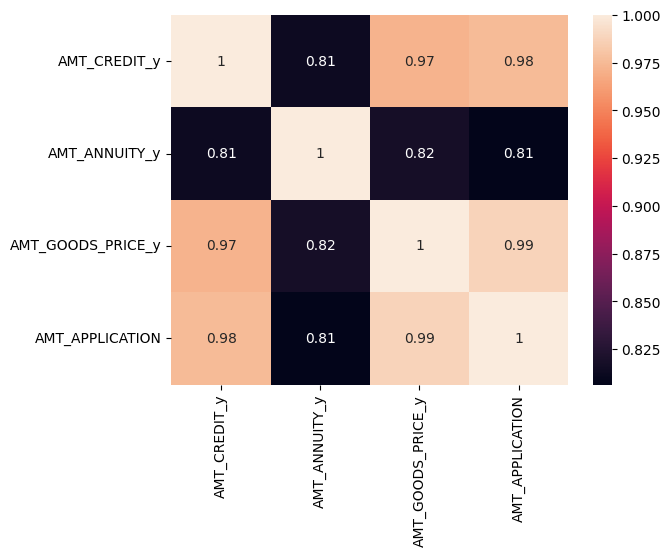

In [121]:
sns.heatmap(df[['AMT_CREDIT_y','AMT_ANNUITY_y','AMT_GOODS_PRICE_y','AMT_APPLICATION']].corr(),annot=True)


credit amount of the loan is also highly correlated with the amt_application

<Axes: xlabel='AMT_GOODS_PRICE_x', ylabel='AMT_CREDIT_x'>

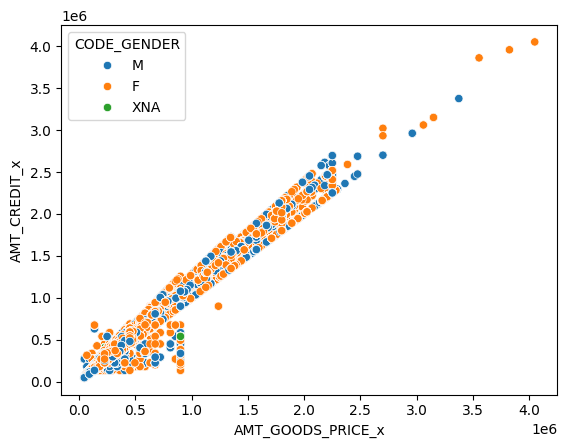

In [231]:
sns.scatterplot(data=df,x='AMT_GOODS_PRICE_x',y='AMT_CREDIT_x',hue='CODE_GENDER')

<Axes: xlabel='AMT_GOODS_PRICE_x', ylabel='AMT_CREDIT_x'>

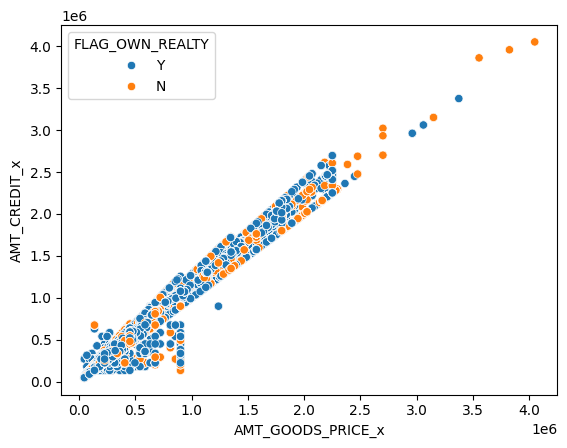

In [232]:
sns.scatterplot(data=df,x='AMT_GOODS_PRICE_x',y='AMT_CREDIT_x',hue='FLAG_OWN_REALTY')

The above scatterplots show how gender and people owning house/flat are represented on the amount of credit for the loan and the price of the goods.

# Conclusion

The exploratory data analysis gave a lot of insights about the dataset
- It is observed that the target column is imbalanced where a huge number of values(around 92%) are '1' and the remaining are '0'. 
- There were a number of null values in the dataset which were cleaned. A number of columns having minimal impact on the target variable were dropped, this helped to remove unwanted features and trim the dataset.
- Features like 'amt_credit' showed right skewed distributions, showing that most individuals have smaller credit amounts.
- It was also observed that cash loans are more prevalent than revolving loans.
- Occupation type influences the loan behaviour where a large number of labourers were involved in loans.
- A larger number of females than males were involved in procuring and paying back loans.
- Thus the analysis gave a detailed insight into the factors and features required to consider when an organization provides loans to its customers, so that the genuine customers are given loans and are able to repay it back at the end of its tenure. Also it helps the organization to ensure minimum losses and proper functioning of the business.